In [1]:
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.cluster import KMeans



#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

Loading in files 

In [2]:

Product = pd.read_csv('order_products_prior.csv')
Item = pd.read_csv('Product.csv')
Order = pd.read_csv('order.csv')
Product = pd.read_csv('order_products_prior.csv')


In [6]:
Product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
Item.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:

Order.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Merging dataset to derive the key columns for the analysis 

In [9]:
order_product = pd.merge(Order, Product, on='order_id', how='inner')
order_product.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,94891,4,prior,4,5,13,15.0,22199,1,0
1,94891,4,prior,4,5,13,15.0,25146,2,0
2,23391,7,prior,17,0,10,28.0,13198,1,1
3,23391,7,prior,17,0,10,28.0,42803,2,1
4,23391,7,prior,17,0,10,28.0,8277,3,1
5,23391,7,prior,17,0,10,28.0,37602,4,1
6,23391,7,prior,17,0,10,28.0,40852,5,1
7,23391,7,prior,17,0,10,28.0,4920,6,1
8,23391,7,prior,17,0,10,28.0,4945,7,1
9,23391,7,prior,17,0,10,28.0,17638,8,1


In [10]:
order_product_item = pd.merge(order_product, Item, on='product_id', how='inner')
order_product_item.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,94891,4,prior,4,5,13,15.0,22199,1,0,Extra-Dry Cava,134,5
1,31925,47329,prior,4,3,10,12.0,22199,1,0,Extra-Dry Cava,134,5
2,94891,4,prior,4,5,13,15.0,25146,2,0,Original Orange Juice,31,7
3,95113,410,prior,2,1,18,7.0,25146,18,0,Original Orange Juice,31,7
4,109354,658,prior,14,0,15,17.0,25146,22,0,Original Orange Juice,31,7


Days_since_prior_order has 20975 nulls

In [11]:
order_product_item.isnull().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20875
product_id                    0
add_to_cart_order             0
reordered                     0
product_name                  0
aisle_id                      0
department_id                 0
dtype: int64

Correlation

<function matplotlib.pyplot.show(*args, **kw)>

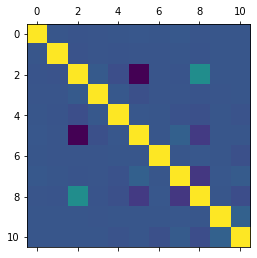

In [12]:
plt.matshow(order_product_item.corr())
plt.show


In [13]:
order_product_item.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
order_id,1.000000,-0.000268,-0.008647,-0.002480,0.000151,0.006866,0.001522,0.010552,-0.001791,0.002699,0.000150
user_id,-0.000268,1.000000,-0.014160,-0.003541,-0.006110,-0.005173,-0.001319,-0.000349,-0.008849,0.000648,0.001958
order_number,-0.008647,-0.014160,1.000000,0.021019,-0.034004,-0.362255,-0.001049,-0.009318,0.303707,0.000681,0.002844
order_dow,-0.002480,-0.003541,0.021019,1.000000,0.012964,-0.029271,-0.000978,-0.002842,-0.006572,-0.003323,0.003599
order_hour_of_day,0.000151,-0.006110,-0.034004,0.012964,1.000000,0.005877,0.000738,-0.019171,-0.028742,0.000980,-0.013488
days_since_prior_order,0.006866,-0.005173,-0.362255,-0.029271,0.005877,1.000000,0.000915,0.052947,-0.131949,0.004481,-0.000217
product_id,0.001522,-0.001319,-0.001049,-0.000978,0.000738,0.000915,1.000000,0.004691,0.006723,0.002016,-0.029600
add_to_cart_order,0.010552,-0.000349,-0.009318,-0.002842,-0.019171,0.052947,0.004691,1.000000,-0.140535,0.005311,0.028134
reordered,-0.001791,-0.008849,0.303707,-0.006572,-0.028742,-0.131949,0.006723,-0.140535,1.000000,0.003454,-0.040124
aisle_id,0.002699,0.000648,0.000681,-0.003323,0.000980,0.004481,0.002016,0.005311,0.003454,1.000000,0.058225


Created a new dataset from the merged dataset(order_product_item)

In [14]:
feature_of_interest =['user_id','order_number','order_dow' ,'order_hour_of_day','days_since_prior_order' ,'product_id','product_name' ]
record= order_product_item [feature_of_interest]

Exploratory Data Analysis of the new dataset(record)

In [15]:
record.info

<bound method DataFrame.info of         user_id  order_number  order_dow  order_hour_of_day  \
0             4             4          5                 13   
1         47329             4          3                 10   
2             4             4          5                 13   
3           410             2          1                 18   
4           658            14          0                 15   
...         ...           ...        ...                ...   
320536    63069            17          3                 11   
320537    63069            17          3                 11   
320538    63069            17          3                 11   
320539    63089             2          2                 17   
320540    63098            14          0                  8   

        days_since_prior_order  product_id  \
0                         15.0       22199   
1                         12.0       22199   
2                         15.0       25146   
3                          

In [16]:
record.describe()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id
count,320541.000000,320541.000000,320541.000000,320541.000000,299666.000000,320541.000000
mean,31402.144462,17.260881,2.742304,13.437931,11.057771,25571.582565
std,18171.258937,17.547255,2.086166,4.208205,8.701282,14086.810241
min,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,15691.000000,5.000000,1.000000,10.000000,5.000000,13517.000000
50%,31302.000000,11.000000,3.000000,13.000000,8.000000,25197.000000
75%,47094.000000,24.000000,5.000000,16.000000,15.000000,37886.000000
max,63098.000000,99.000000,6.000000,23.000000,30.000000,49688.000000


Data visualizations

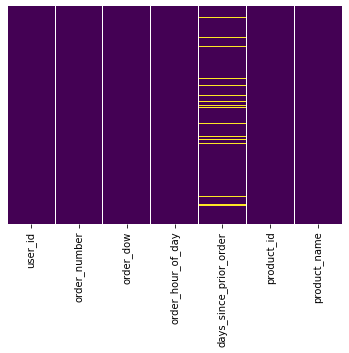

In [17]:
sns.heatmap(record.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [18]:
record.shape

(320541, 7)

In [19]:
record.corr()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id
user_id,1.000000,-0.014160,-0.003541,-0.006110,-0.005173,-0.001319
order_number,-0.014160,1.000000,0.021019,-0.034004,-0.362255,-0.001049
order_dow,-0.003541,0.021019,1.000000,0.012964,-0.029271,-0.000978
order_hour_of_day,-0.006110,-0.034004,0.012964,1.000000,0.005877,0.000738
days_since_prior_order,-0.005173,-0.362255,-0.029271,0.005877,1.000000,0.000915
product_id,-0.001319,-0.001049,-0.000978,0.000738,0.000915,1.000000


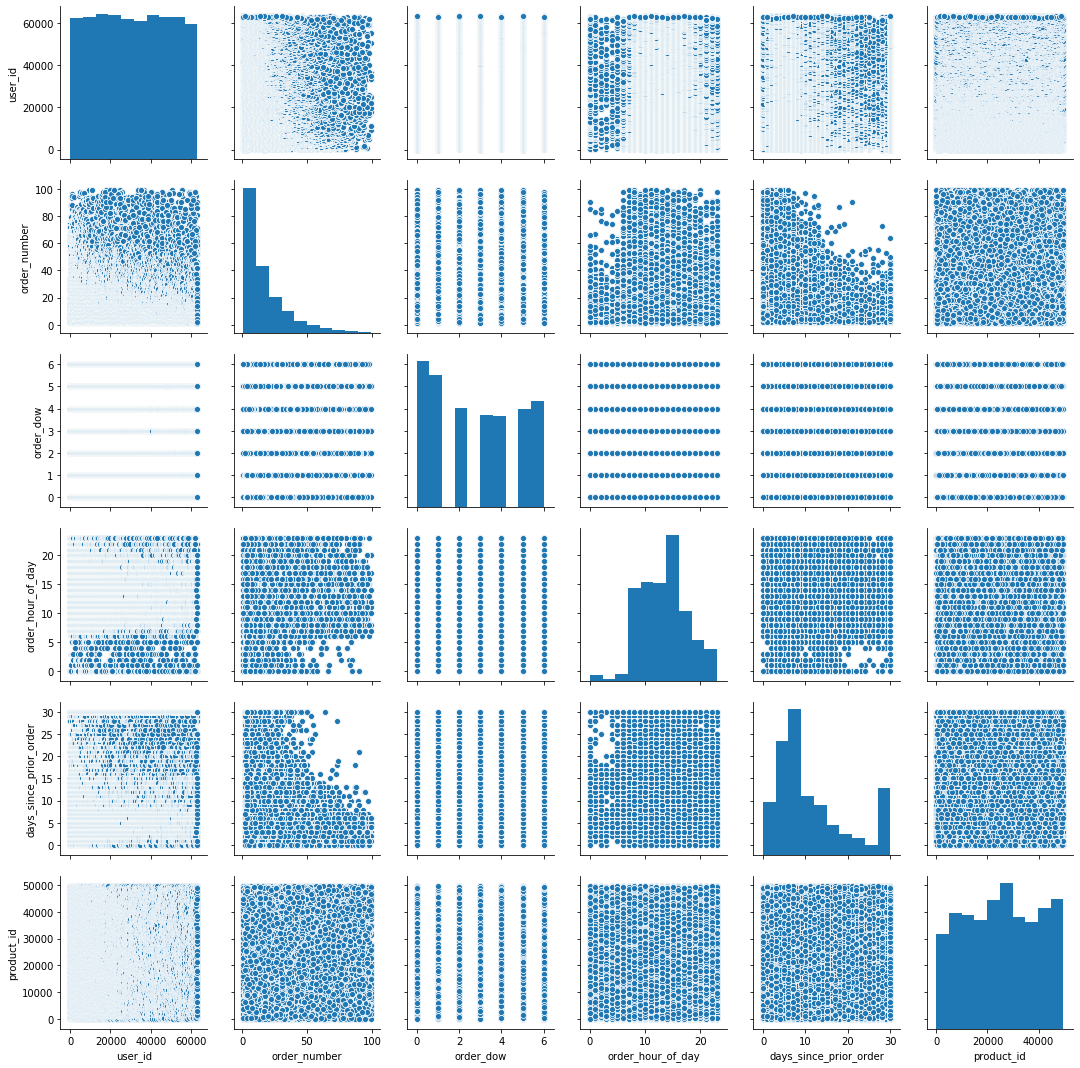

In [20]:
sns.pairplot(record)

In [21]:
record.shape

(320541, 7)

In [22]:
record.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name
0,4,4,5,13,15.0,22199,Extra-Dry Cava
1,47329,4,3,10,12.0,22199,Extra-Dry Cava
2,4,4,5,13,15.0,25146,Original Orange Juice
3,410,2,1,18,7.0,25146,Original Orange Juice
4,658,14,0,15,17.0,25146,Original Orange Juice


In [23]:
record.describe()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id
count,320541.000000,320541.000000,320541.000000,320541.000000,299666.000000,320541.000000
mean,31402.144462,17.260881,2.742304,13.437931,11.057771,25571.582565
std,18171.258937,17.547255,2.086166,4.208205,8.701282,14086.810241
min,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,15691.000000,5.000000,1.000000,10.000000,5.000000,13517.000000
50%,31302.000000,11.000000,3.000000,13.000000,8.000000,25197.000000
75%,47094.000000,24.000000,5.000000,16.000000,15.000000,37886.000000
max,63098.000000,99.000000,6.000000,23.000000,30.000000,49688.000000


In [24]:
record.isnull().sum()

user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20875
product_id                    0
product_name                  0
dtype: int64

In [25]:
record['days_since_prior_order'].fillna(value=0 , inplace=True)

C:\Users\agame\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
record.isnull().sum()

user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
product_name              0
dtype: int64

In [ ]:
import seaborn as sns
sns.boxplot(x=record['days_since_prior_order'])

In [ ]:
import seaborn as sns
sns.boxplot(x=record['order_number'])

In [ ]:
sns.distplot(record['order_hour_of_day'],kde=False)

In [ ]:
sns.distplot(record['order_number'],kde=False)

In [ ]:
sns.distplot(record['order_dow'],kde=False)

In [ ]:
sns.distplot(record['days_since_prior_order'],kde=False)

In [ ]:
plt.figure(figsize=(12,10))
cor = record.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Set 'user_id' and 'product_id' as index

In [27]:
record = record.set_index(['user_id','product_id'])
record.head()

,,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name
user_id,product_id,,,,,
4,22199,4,5,13,15.0,Extra-Dry Cava
47329,22199,4,3,10,12.0,Extra-Dry Cava
4,25146,4,5,13,15.0,Original Orange Juice
410,25146,2,1,18,7.0,Original Orange Juice
658,25146,14,0,15,17.0,Original Orange Juice


Feature Engineering

In [28]:
def Recent_LastTwoWeeks(record):
    if  record['days_since_prior_order'] <14:
         return 1
    else :
        return 0
record['Recent_LastTwoWeeks'] = record.apply(lambda record:Recent_LastTwoWeeks(record), axis =1)

def Recent_LastFourWeeks(record):
    if  record['days_since_prior_order'] > 14:
         return 1
    else :
        return 0
record['Recent_LastFourWeeks'] = record.apply(lambda record:Recent_LastFourWeeks(record), axis =1)

def Recent_Laggard_MoreThanFourWeeks(record):
    if  record['days_since_prior_order'] > 30:
         return 1
    else :
        return 0
record['Recent_Laggard_MoreThanFourWeeks'] = record.apply(lambda record:Recent_Laggard_MoreThanFourWeeks(record), axis =1)



In [29]:
def f(x):
    if   (x <=6):
        return 'EarlyMorning'
    elif (x <=8): 
        return 'Morning'
    elif (x <=11): 
        return 'Lunch' 
    elif (x <= 17): 
        return 'Afternoon'
    elif (x > 17): 
        return 'Evening'
   
 

In [30]:
record['Hour'] = record['order_hour_of_day'].apply(f)

In [31]:
def f(x):
    if   (x ==0):
        return 'Sunday'
    elif (x ==1): 
        return 'Monday'
    elif (x ==2): 
        return 'Tuesday' 
    elif (x ==3): 
        return 'Wednesday'
    elif (x ==4): 
        return 'Thursday'
    elif (x ==5): 
        return 'Friday'
    elif (x ==6): 
        return 'Saturday'
    

In [32]:
record['Day'] = record['order_dow'].apply(f)


Set dummies to the columns

In [33]:
pd.get_dummies(data= record, columns=['Hour', 'Day','product_name'])

order_number  order_dow  order_hour_of_day  \
user_id product_id                                               
4       22199                  4          5                 13   
47329   22199                  4          3                 10   
4       25146                  4          5                 13   
410     25146                  2          1                 18   
658     25146                 14          0                 15   
...                          ...        ...                ...   
63069   12560                 17          3                 11   
        3103                  17          3                 11   
        3056                  17          3                 11   
63089   6494                   2          2                 17   
63098   13366                 14          0                  8   

                    days_since_prior_order  Recent_LastTwoWeeks  \
user_id product_id                                                
4       22199                         15.0                    0   
47329   22199                         12.0                    1   
4       25146                         15.0                    0   
410     25146                          7.0                    1   
658     25146                         17.0                    0   
...                                    ...                  ...   
63069   12560                         15.0                    0   
        3103                          15.0                    0   
        3056                          15.0                    0   
63089   6494                           7.0                    1   
63098   13366                         30.0                    0   

                    Recent_LastFourWeeks  Recent_Laggard_MoreThanFourWeeks  \
user_id product_id                                                           
4       22199                          1                                 0   
47329   22199                          0                                 0   
4       25146                          1                                 0   
410     25146                          0                                 0   
658     25146                          1                                 0   
...                                  ...                               ...   
63069   12560                          1                                 0   
        3103                           1                                 0   
        3056                           1                                 0   
63089   6494                           0                                 0   
63098   13366                          1                                 0   

                    Hour_Afternoon  Hour_EarlyMorning  Hour_Evening  ...  \
user_id product_id                                                   ...   
4       22199                    1                  0             0  ...   
47329   22199                    0                  0             0  ...   
4       25146                    1                  0             0  ...   
410     25146                    0                  0             1  ...   
658     25146                    1                  0             0  ...   
...                            ...                ...           ...  ...   
63069   12560                    0                  0             0  ...   
        3103                     0                  0             0  ...   
        3056                     0                  0             0  ...   
63089   6494                     1                  0             0  ...   
63098   13366                    0                  0             0  ...   

                    product_name_with Bleach Powder Cleanser  \
user_id product_id                                             
4       22199                                              0   
47329   22199                                              0   
4       25146                

In [ ]:
#Hour= pd.get_dummies(record['Hour'], drop_first = True)
#Hour.sample(10)

In [ ]:
#Day= pd.get_dummies(record['Day'], drop_first = True)
#Day.sample(10)

In [ ]:
#product_name = pd.get_dummies(record['product_name'], drop_first = True)
#product_name.sample(10)

In [ ]:

#data= pd.concat([record.drop(['product_name'], axis=1), product_name],axis=1)

Dropping the columns that has been duplicated from the feature engineering.

In [34]:
record.drop(['order_number','order_hour_of_day', 'days_since_prior_order','order_dow'],axis=1, inplace=True)

While applying pd.concat to 'product_name' I got an error,so I saved the output to 'new.csv'.

In [35]:
df = pd.read_csv('new.csv')


In [36]:
product_name = pd.get_dummies(df['product_name'], drop_first = True)
product_name.sample(10)

,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,...,with Bleach Powder Cleanser,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Twist Ties Sandwich & Storage Bags,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
227318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_2= pd.concat([df.drop(['product_name'], axis=1),  product_name],axis=1)
data_2.sample(10)

,user_id,product_id,Recent_LastTwoWeeks,Recent_LastFourWeeks,Recent_Laggard_MoreThanFourWeeks,Monday,Saturday,Sunday,Thursday,Tuesday,...,with Bleach Powder Cleanser,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Twist Ties Sandwich & Storage Bags,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
76966,6064,26209,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
263233,12711,47521,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118926,53137,22276,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237268,15799,31577,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93086,13265,27966,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
319008,53694,44952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193260,55649,4006,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93467,30514,27966,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90697,37424,432,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29486,37592,24852,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data_2 = data_2.set_index(['user_id'])
data_2.head()

,product_id,Recent_LastTwoWeeks,Recent_LastFourWeeks,Recent_Laggard_MoreThanFourWeeks,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,with Bleach Powder Cleanser,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Twist Ties Sandwich & Storage Bags,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
4,22199,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47329,22199,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,25146,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,25146,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
658,25146,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After applying feature engineering and dummies, the dataset became so large to run on my computer. I appied a fraction of 2% to the dataset to make it manageble

In [39]:

rows = data_2.sample(frac =.02) 

In [40]:
if (0.25*(len(data_2))== len(rows)): 
    print( "Cool") 
    print(len(data_2), len(rows)) 

In [41]:
rows

,product_id,Recent_LastTwoWeeks,Recent_LastFourWeeks,Recent_Laggard_MoreThanFourWeeks,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,with Bleach Powder Cleanser,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Twist Ties Sandwich & Storage Bags,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
16184,46603,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11961,2435,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6299,6121,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35389,43352,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,45445,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34318,1374,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20275,17389,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14265,49044,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
rows.drop(['Recent_LastFourWeeks', 'Recent_Laggard_MoreThanFourWeeks'],axis=1, inplace=True)

Modelling

In [43]:
x = rows.drop(['Recent_LastTwoWeeks'], axis =1).values
y = rows['Recent_LastTwoWeeks'].values

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4, test_size=0.3)

Cross validation to estimate how the model would perform 

In [57]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))

  
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR [0.72994652 0.74632189]


C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB [0.72994652 0.74632189]


C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF [0.71078431 0.72492198]


C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC [0.72994652 0.74632189]


C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Dtree [0.66755793 0.68390548]


C:\Users\agame\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN [0.69607843 0.68123049]


Modelling - Picked Linear Regression because it will answer all the probability questions (“Would the customer buy this item or return back to shop again’) returning a 0 or 1

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=40)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()


In [45]:
clf.fit(x_train, y_train)


LinearRegression()

In [46]:
clf.predict(x_test)

array([0.9473521 , 0.63931282, 0.83896123, ..., 0.66505084, 0.92145806,
       0.88254833])

In [47]:
Predicted = clf.predict(x_test)

Evaluating Regression Models

Accuracy

In [48]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report 

In [49]:
accuracy_score(y_test, Predicted.round())

0.6954261954261954

Confusion Matrix

In [51]:
print(confusion_matrix(y_test, Predicted.round()))

[[  42  465]
 [ 121 1296]]


Classification report


In [52]:
print(classification_report(y_test, Predicted.round()))

              precision    recall  f1-score   support

           0       0.26      0.08      0.13       507
           1       0.74      0.91      0.82      1417

    accuracy                           0.70      1924
   macro avg       0.50      0.50      0.47      1924
weighted avg       0.61      0.70      0.63      1924

